<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/Assignment_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Code: DA-AG-010**

# **Regression & Its Evaluation**

## **Question 1: What is Simple Linear Regression?**

**Answer:**

Simple Linear Regression is a statistical technique used to understand the relationship between **one independent variable (X)** and **one dependent variable (Y)**.  

It assumes a linear relationship of the form:

\[
Y = b_0 + b_1 X + \varepsilon
\]

Where:

- \(b_0\) = Intercept (value of Y when X = 0)  
- \(b_1\) = Slope (change in Y for one unit change in X)  
- \(\varepsilon\) = Error term (difference between predicted and actual values)

It helps in prediction (forecasting Y for a given X) and understanding the strength of relationships between variables.

---

## **Question 2: Key assumptions of Simple Linear Regression**

- **Linearity:** Relationship between X and Y is linear.  
- **Independence:** Observations are independent of each other.  
- **Homoscedasticity:** Variance of residuals is constant across X.  
- **Normality of Errors:** Residuals should be approximately normally distributed.  
- **No Autocorrelation:** Errors should not be correlated.  
- **No Perfect Multicollinearity:** Only one independent variable in simple regression.  

Violation leads to biased or inefficient estimates.

---

## **Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

Heteroscedasticity occurs when the **variance of residuals is not constant** across values of the independent variable.  

- Appears as a **funnel shape** in residual plots.  
- Violates OLS assumptions, leads to inefficient estimators, and unreliable hypothesis tests.  

**Fixes:**

- Log or square-root transformations  
- Weighted Least Squares (WLS)  
- Robust standard errors  

---

## **Question 4: What is Multiple Linear Regression (MLR)?**

MLR models the relationship between **two or more independent variables** and a dependent variable:

\[
Y = b_0 + b_1 X_1 + b_2 X_2 + ... + b_n X_n + \varepsilon
\]

Where:

- \(X_1, X_2, ..., X_n\) are predictors  
- \(b_0\) is the intercept  
- \(b_1, b_2, ..., b_n\) are coefficients  

Captures complex relationships influencing Y.

---

## **Question 5:  What is polynomial regression, and how does it differ from linear regression?**

Polynomial Regression models **non-linear relationships** by adding higher-degree terms:

\[
Y = b_0 + b_1 X + b_2 X^2 + ... + b_n X^n + \varepsilon
\]

**Difference from linear regression:**

- Linear regression fits a straight line.  
- Polynomial regression fits a curved line.  
- Still linear in coefficients → can use OLS.

---

# **Question 6: Implement a Python program to fit a Simple Linear Regression model to**
**the following sample data:**

**X = [1, 2, 3, 4, 5]**

**Y = [2.1, 4.3, 6.1, 7.9, 10.2]**

**Plot the regression line over the data points.**




Intercept: 0.17999999999999794
Slope: 1.9800000000000004


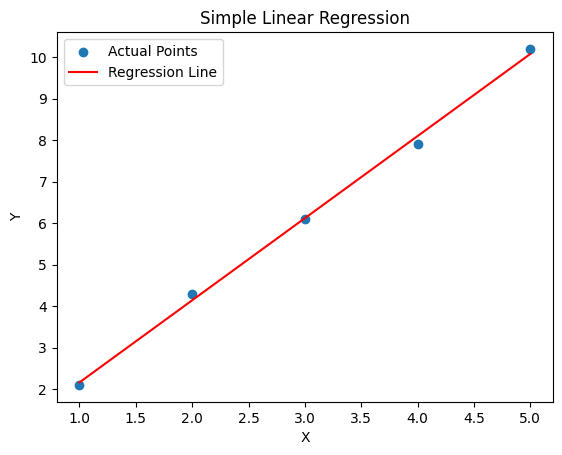

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model training
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot
plt.scatter(X, Y, label="Actual Points")
plt.plot(X, Y_pred, label="Regression Line", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


# **Question 7: Fit a Multiple Linear Regression model on this sample data:**
**Area = [1200, 1500, 1800, 2000]**

**Rooms = [2, 3, 3, 4]**

**Price = [250000, 300000, 320000, 370000]**

**Check for multicollinearity using VIF and report the results**

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# DataFrame
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Model
lr = LinearRegression()
lr.fit(X, y)

print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Check VIF
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


# **Question 8: Implement polynomial regression on the following data:**
**X = [1, 2, 3, 4, 5]**

**Y = [2.2, 4.8, 7.5, 11.2, 14.7]**

**Fit a 2nd-degree polynomial and plot the resulting curve.**

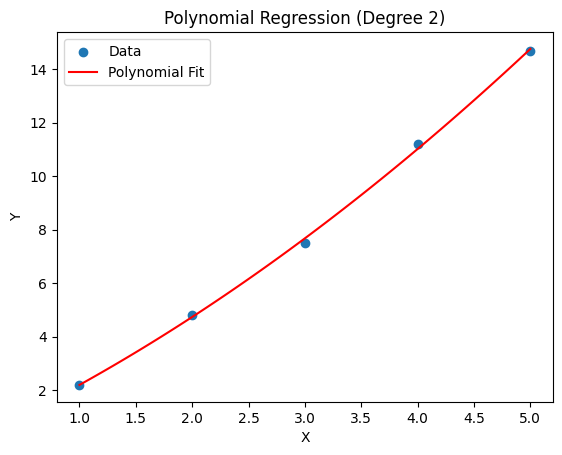

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

# Predict
X_grid = np.linspace(1, 5, 100).reshape(-1, 1)
Y_pred = poly_model.predict(poly.transform(X_grid))

# Plot
plt.scatter(X, Y, label="Data")
plt.plot(X_grid, Y_pred, label="Polynomial Fit", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


## **Question 9: Create a residuals plot for a regression model trained on this data:**
**X = [10, 20, 30, 40, 50]**

**Y = [15, 35, 40, 50, 65]**

**Assess heteroscedasticity by examining the spread of residuals.**

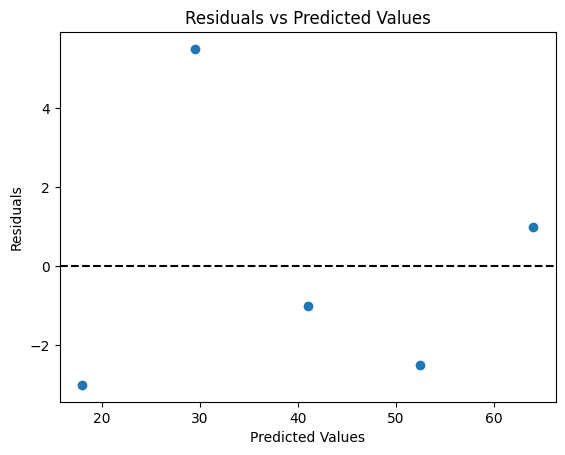

Breusch-Pagan test (p-values): 0.2425901780843885 0.36628923988686196


In [4]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit model
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Residuals plot
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Breusch-Pagan Test
X_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_const)
print("Breusch-Pagan test (p-values):", bp_test[1], bp_test[3])


## **Question 10:**
**Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**

---

# Predicting House Prices: Handling Heteroscedasticity and Multicollinearity

## Step 1: Detect and Confirm the Issues

### 1. Heteroscedasticity
- **Definition:** The variance of errors is not constant across all levels of the independent variables. Violates linear regression assumptions.
- **Detection Methods:**
  - Plot residuals vs. predicted values (look for funnel shape)
  - Statistical tests: **Breusch-Pagan test** or **White test**

### 2. Multicollinearity
- **Definition:** Independent variables are highly correlated, inflating standard errors and destabilizing coefficient estimates.
- **Detection Methods:**
  - **Correlation matrix** (look for correlation > 0.8)
  - **Variance Inflation Factor (VIF):** VIF > 5–10 indicates multicollinearity

---

## Step 2: Handle Heteroscedasticity

1. **Transform Dependent Variable (Y)**
   - Apply log, square root, or Box-Cox transformation
   - Example: `log(price) ~ area + rooms + location`

2. **Weighted Least Squares (WLS)**
   - Assign weights inversely proportional to the variance of errors

3. **Robust Standard Errors**
   - Use heteroscedasticity-robust standard errors (White’s errors) for valid inference

---

## Step 3: Handle Multicollinearity

1. **Remove or Combine Highly Correlated Variables**
   - Drop redundant features or combine them (e.g., `total_rooms + area` → "space per room")

2. **Principal Component Analysis (PCA)**
   - Transform correlated features into uncorrelated components for regression

3. **Regularization Techniques**
   - **Ridge Regression (L2)** or **Lasso Regression (L1)** to penalize large coefficients and reduce multicollinearity

---

## Step 4: Model Evaluation and Validation

1. **Residual Plots**
   - Ensure residuals have constant variance and no obvious patterns after adjustments

2. **Cross-Validation**
   - Confirm the model generalizes well

3. **Model Comparison**
   - Compare metrics like RMSE, MAE, R² between original and adjusted models

---

